# Movie Rating Analysis

This is an example of using R and the Tidyverse to analyze movie ratings.

## Setup

Load some libraries!

In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


Set some options for what Jupyter output looks like:

In [19]:
options(repr.matrix.max.rows=20, 
        repr.plot.height=4.5)

## Load Data

The ratings are in `ratings.csv`

In [4]:
ratings = read_csv('data/ml-20m/ratings.csv')
ratings

Parsed with column specification:
cols(
  userId = col_integer(),
  movieId = col_integer(),
  rating = col_double(),
  timestamp = col_integer()
)


userId movieId rating timestamp 
1        1        2     3.5    1112486027
2        1       29     3.5    1112484676
3        1       32     3.5    1112484819
4        1       47     3.5    1112484727
5        1       50     3.5    1112484580
6        1      112     3.5    1094785740
7        1      151     4.0    1094785734
8        1      223     4.0    1112485573
9        1      253     4.0    1112484940
10       1      260     4.0    1112484826
⋮        ⋮      ⋮       ⋮      ⋮         
20000254 138493 60816   4.5    1259865163
20000255 138493 61160   4.0    1258390537
20000256 138493 65682   4.5    1255816373
20000257 138493 66762   4.5    1255805408
20000258 138493 68319   4.5    1260209720
20000259 138493 68954   4.5    1258126920
20000260 138493 69526   4.5    1259865108
20000261 138493 69644   3.0    1260209457
20000262 138493 70286   5.0    1258126944
20000263 138493 71619   2.5    1255811136

In [6]:
movies = read_csv('data/ml-20m/movies.csv')
head(movies)

Parsed with column specification:
cols(
  movieId = col_integer(),
  title = col_character(),
  genres = col_character()
)


movieId title                             
1 1       Toy Story (1995)                  
2 2       Jumanji (1995)                    
3 3       Grumpier Old Men (1995)           
4 4       Waiting to Exhale (1995)          
5 5       Father of the Bride Part II (1995)
6 6       Heat (1995)                       
  genres                                     
1 Adventure|Animation|Children|Comedy|Fantasy
2 Adventure|Children|Fantasy                 
3 Comedy|Romance                             
4 Comedy|Drama|Romance                       
5 Comedy                                     
6 Action|Crime|Thriller

## Movie Summary Info

Group by movie ID to summarize.

Within `summarize`, `n()` tells us how many are in the current group.

In [10]:
movie_summary = ratings %>%
    group_by(movieId) %>%
    summarize(RatingCount = n(),
              MeanRating = mean(rating)) %>%
    inner_join(movies %>% select(movieId, name=title))

Joining, by = "movieId"


In [12]:
movie_summary %>% head()

movieId RatingCount MeanRating title                             
1 1       49695       3.921240   Toy Story (1995)                  
2 2       22243       3.211977   Jumanji (1995)                    
3 3       12735       3.151040   Grumpier Old Men (1995)           
4 4        2756       2.861393   Waiting to Exhale (1995)          
5 5       12161       3.064592   Father of the Bride Part II (1995)
6 6       23899       3.834930   Heat (1995)

What is the most frequently-rated movie?

- `arrange` sorts the rows of a data frame

In [16]:
movie_summary %>%
    arrange(desc(RatingCount)) %>%
    head(n=10)

movieId RatingCount MeanRating title                                    
1   296    67310       4.174231   Pulp Fiction (1994)                      
2   356    66172       4.029000   Forrest Gump (1994)                      
3   318    63366       4.446990   Shawshank Redemption, The (1994)         
4   593    63299       4.177057   Silence of the Lambs, The (1991)         
5   480    59715       3.664741   Jurassic Park (1993)                     
6   260    54502       4.190672   Star Wars: Episode IV - A New Hope (1977)
7   110    53769       4.042534   Braveheart (1995)                        
8   589    52244       3.931954   Terminator 2: Judgment Day (1991)        
9  2571    51334       4.187186   Matrix, The (1999)                       
10  527    50054       4.310175   Schindler's List (1993)

What is the highest-rated movie?

In [17]:
movie_summary %>%
    arrange(desc(MeanRating)) %>%
    head(n=10)

movieId RatingCount MeanRating
1  26718   1           5         
2  27914   1           5         
3  32230   1           5         
4  40404   1           5         
5  54326   1           5         
6  72235   1           5         
7  79866   1           5         
8  81117   1           5         
9  86055   1           5         
10 88488   1           5         
   title                                                                    
1  Life On A String (Bian chang Bian Zou) (1991)                            
2  Hijacking Catastrophe: 9/11, Fear & the Selling of American Empire (2004)
3  Snow Queen, The (Lumikuningatar) (1986)                                  
4  Al otro lado (2004)                                                      
5  Sierra, La (2005)                                                        
6  Between the Devil and the Deep Blue Sea (1995)                           
7  Schmatta: Rags to Riches to Rags (2009)                                  
8  Moth, The (Cma) (1980)                                                   
9  Foster Brothers, The (Süt kardesler) (1976)                              
10 Summer Wishes, Winter Dreams (1973)

## Make some plots

How are rating counts distributed?

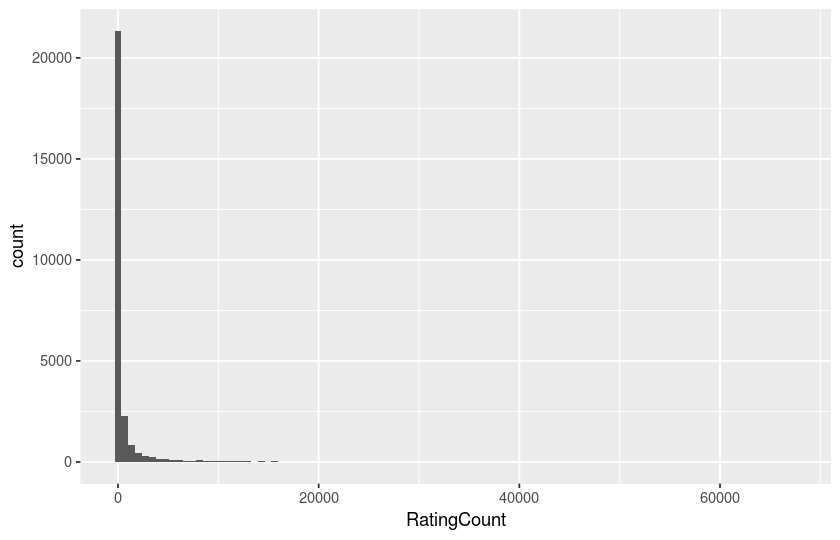

In [21]:
ggplot(movie_summary) +
    aes(x=RatingCount) +
    geom_histogram(bins=100)

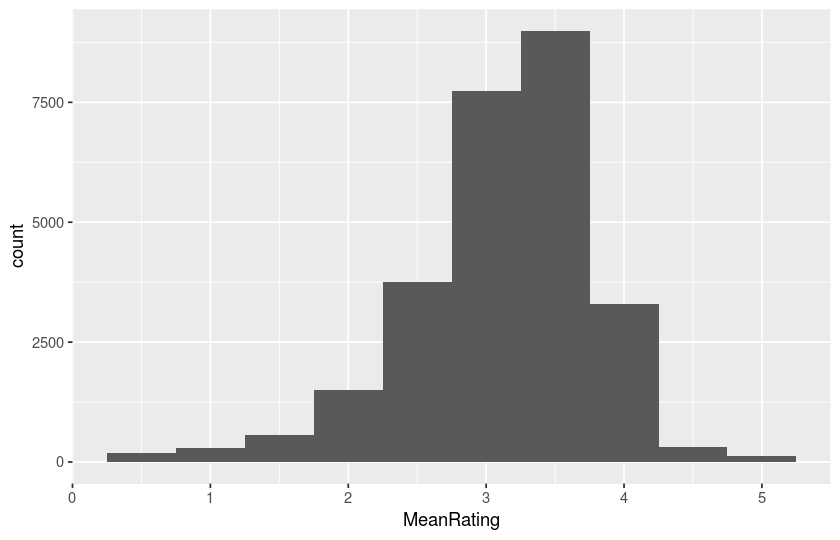

In [22]:
ggplot(movie_summary) +
    aes(x=MeanRating) +
    geom_histogram(binwidth=0.5)

In [28]:
iron_giant = movies %>%
    filter(grepl("^Iron Giant", title)) %>%
    select(-genres) %>%
    inner_join(ratings)
head(iron_giant)

Joining, by = "movieId"


movieId title                  userId rating timestamp 
1 2761    Iron Giant, The (1999)  1     3.0    1112484759
2 2761    Iron Giant, The (1999) 11     4.5    1230788701
3 2761    Iron Giant, The (1999) 14     4.0    1225314416
4 2761    Iron Giant, The (1999) 21     4.0     992189682
5 2761    Iron Giant, The (1999) 27     5.0    1112243866
6 2761    Iron Giant, The (1999) 58     4.5    1144060195

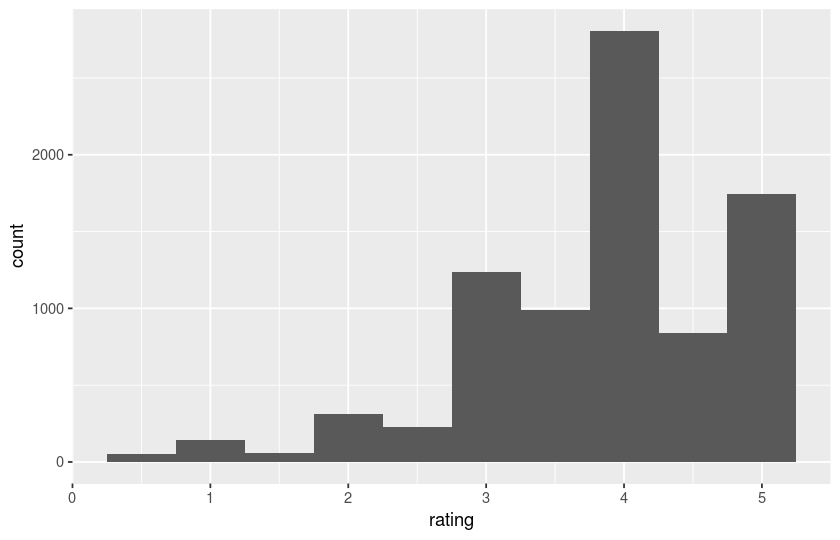

In [29]:
ggplot(iron_giant) +
    aes(x=rating) +
    geom_histogram(binwidth=0.5)